# Trabajo académico final escrito: Genera una aplicación de inteligencia artificial que use librerías de software libre a través de herramientas colaborativas

## Nombre: Julio César Luna Díaz

Este proyecto tiene como objetivo aplicar herramientas de análisis de datos para evaluar patrones clínicos relacionados con la diabetes tipo II, utilizando un dataset del repositorio de Kaggle [https://www.kaggle.com/datasets/mathchi/diabetes-data-set]. El análisis se realiza tanto desde un archivo CSV como desde una base de datos SQLite, y se visualizan los resultados mediante gráficos estadísticos.

Se ha decidido aplicar técnicas de limpieza, agrupamiento y visualización utilizando las librerías **Pandas**, **Matplotlib**, **Seaborn** y **SQLite**.

In [10]:
!pip3 install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


## Importación de librerías

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Estilo de visualización
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

### Carga del dataset CSV (Kaggle)

In [12]:
# Ruta al archivo CSV
csv_path = '../datasets/diabetes.csv'
df_csv = pd.read_csv(csv_path)

# Vista previa
df_csv.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Carga del dataset SQL

In [13]:
# Crear base de datos SQLite en memoria o en archivo
conn = sqlite3.connect("patients.db")
cursor = conn.cursor()

# Ejecutar script de creación
with open('../db/create_db.sql', 'r') as f:
    cursor.executescript(f.read())

# Ejecutar script de inserción
with open('../db/insert_data.sql', 'r') as f:
    cursor.executescript(f.read())

# Leer datos desde SQLite
df_sql = pd.read_sql_query("SELECT * FROM patients", conn)
df_sql.head()

,id,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,1,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,2,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,3,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Análisis estadístico y exploratorio

A continuación se realiza un resumen estadístico general del conjunto de datos y un análisis de las variables más relevantes asociadas con el diagnóstico de diabetes.

In [27]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          100 non-null    int64  
 1   pregnancies                 100 non-null    int64  
 2   glucose                     100 non-null    float64
 3   blood_pressure              100 non-null    float64
 4   skin_thickness              100 non-null    float64
 5   insulin                     100 non-null    float64
 6   bmi                         100 non-null    float64
 7   diabetes_pedigree_function  100 non-null    float64
 8   age                         100 non-null    int64  
 9   outcome                     100 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 7.9 KB


In [14]:
# Estadísticas generales
df_csv.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
df_sql.describe()

,id,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,4.610000,117.940000,68.070000,19.900000,74.350000,30.996000,0.46893,34.420000,0.370000
std,29.011492,3.589814,33.712636,22.009298,16.306719,126.446649,9.611734,0.37117,11.212529,0.485237
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.10200,21.000000,0.000000
25%,25.750000,1.000000,99.000000,64.000000,0.000000,0.000000,25.300000,0.24800,25.750000,0.000000
50%,50.500000,4.000000,112.500000,72.000000,21.500000,0.000000,31.800000,0.34300,31.000000,0.000000
75%,75.250000,7.000000,139.000000,80.000000,32.250000,110.000000,37.225000,0.58375,42.000000,1.000000
max,100.000000,15.000000,197.000000,110.000000,60.000000,846.000000,49.700000,2.28800,60.000000,1.000000


In [15]:
# Conteo de resultados
print("Distribución de Outcome (CSV):")
print(df_csv['Outcome'].value_counts())

print("\nPromedio de Glucosa por Outcome (SQL):")
print(df_sql.groupby('outcome')['glucose'].mean())

Distribución de Outcome (CSV):
Outcome
0    500
1    268
Name: count, dtype: int64

Promedio de Glucosa por Outcome (SQL):
outcome
0    106.555556
1    137.324324
Name: glucose, dtype: float64


## Visualizaciones

### Histograma de glucosa (CSV - Kaggle)

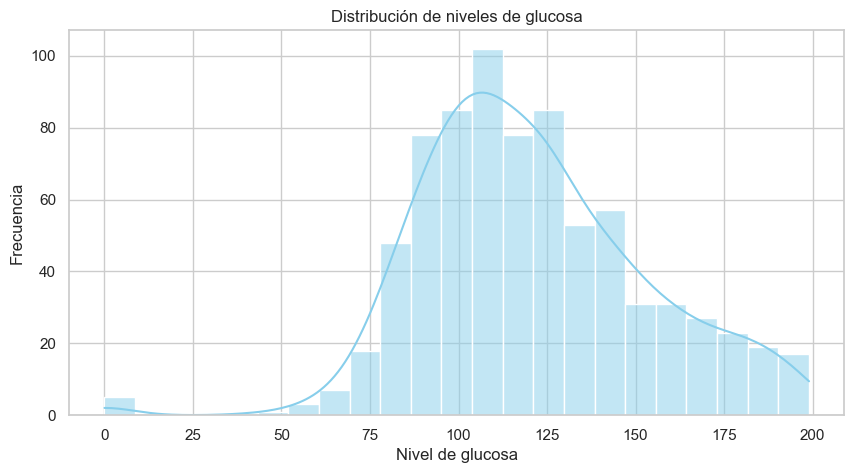

In [24]:
sns.histplot(df_csv['Glucose'], kde=True, color='skyblue')
plt.title("Distribución de niveles de glucosa")
plt.xlabel("Nivel de glucosa")
plt.ylabel("Frecuencia")
plt.show()

### Comparación de BMI por diagnóstico (CSV - Kaggle)

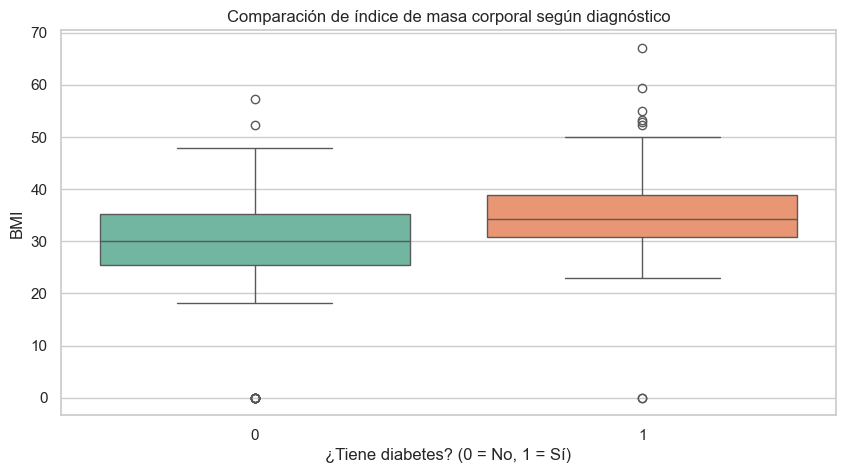

In [19]:
sns.boxplot(x='Outcome', y='BMI', data=df_csv, hue='Outcome', palette='Set2', legend=False)
plt.title("Comparación de índice de masa corporal según diagnóstico")
plt.xlabel("¿Tiene diabetes? (0 = No, 1 = Sí)")
plt.ylabel("BMI")
plt.show()

### Gráfico de barras (SQL)

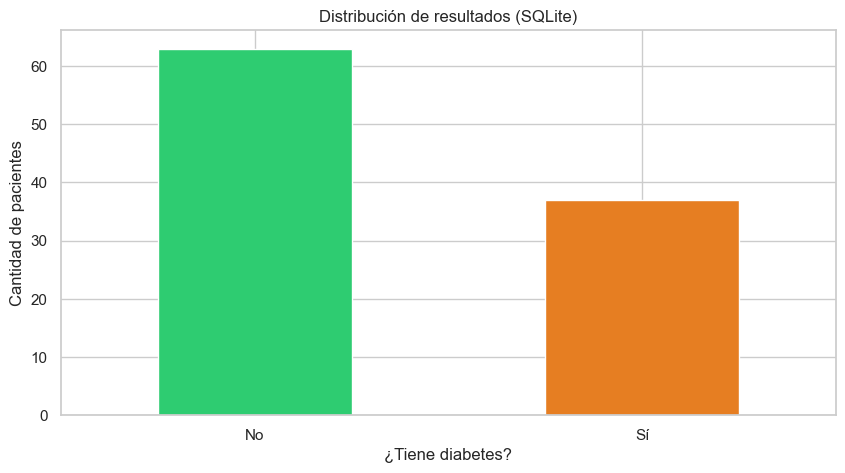

In [30]:
df_sql['outcome'].value_counts().plot(kind='bar', color=['#2ecc71', '#e67e22'])
plt.title("Distribución de resultados (SQLite)")
plt.xlabel("¿Tiene diabetes?")
plt.ylabel("Cantidad de pacientes")
plt.xticks(ticks=[0, 1], labels=["No", "Sí"], rotation=0)
plt.show()

### Diagrama de dispersión: Edad vs. Glucosa

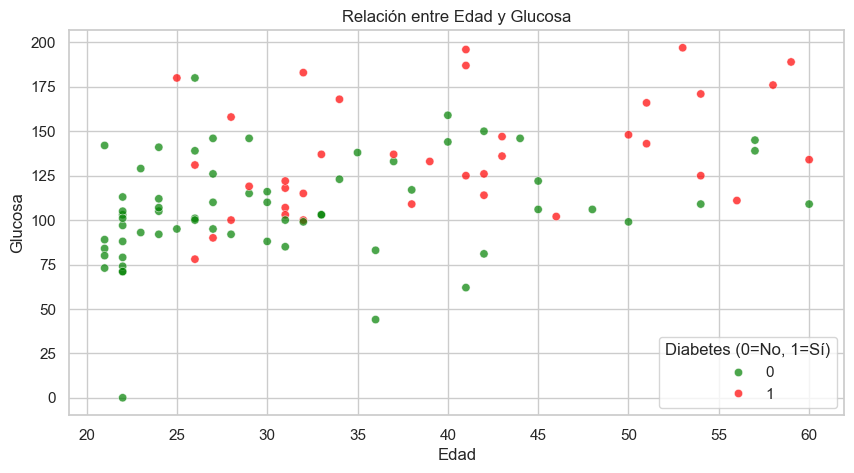

In [31]:
sns.scatterplot(
    data=df_sql,
    x="age",
    y="glucose",
    hue="outcome",
    palette={0: "green", 1: "red"},
    alpha=0.7
)
plt.title("Relación entre Edad y Glucosa")
plt.xlabel("Edad")
plt.ylabel("Glucosa")
plt.legend(title="Diabetes (0=No, 1=Sí)")
plt.show()


### Mapa de calor de correlaciones (SQL)

<Axes: >

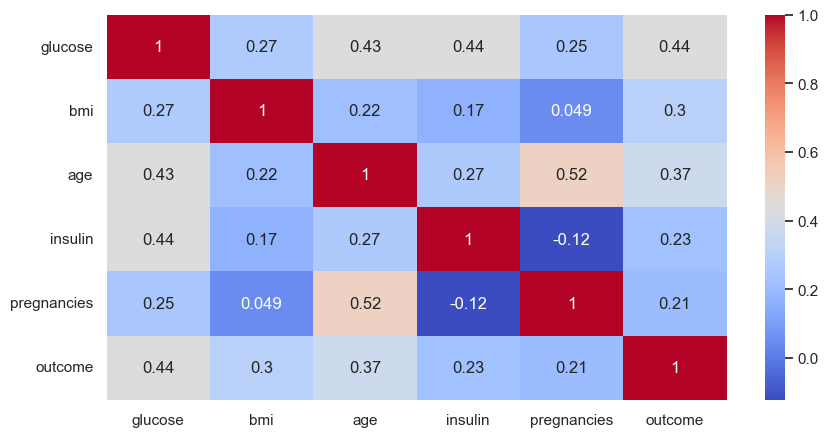

In [32]:
cols = ['glucose', 'bmi', 'age', 'insulin', 'pregnancies', 'outcome']
sns.heatmap(df_sql[cols].corr(), annot=True, cmap="coolwarm")


## Fusión de los datasets

### Fusión

In [36]:
# Alinear columnas entre ambos datasets
df_sql_renamed = df_sql.rename(columns={
    'glucose': 'Glucose',
    'blood_pressure': 'BloodPressure',
    'skin_thickness': 'SkinThickness',
    'insulin': 'Insulin',
    'bmi': 'BMI',
    'diabetes_pedigree_function': 'DiabetesPedigreeFunction',
    'age': 'Age',
    'pregnancies': 'Pregnancies',
    'outcome': 'Outcome'
})[[
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]]

df_csv_filtered = df_csv[[
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]]

# Combinar CSV + SQL
df_combined = pd.concat([df_csv_filtered, df_sql_renamed], ignore_index=True)

df_combined.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Conteo de pacientes por rango de edad

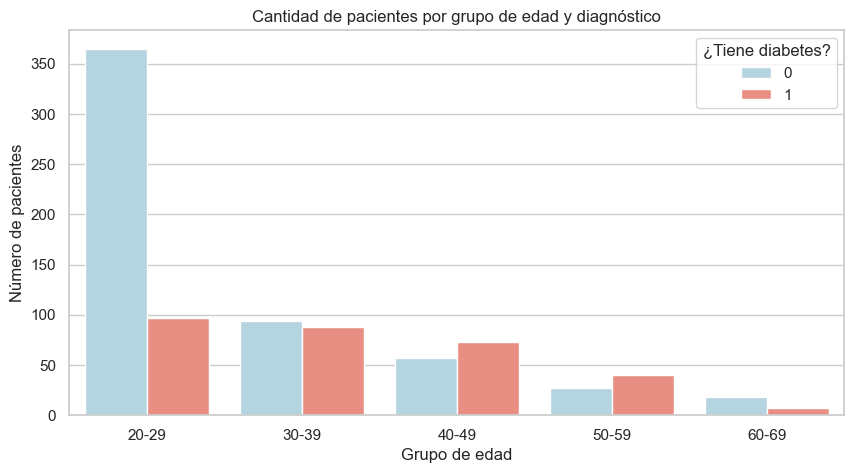

In [41]:
# Crear columna de rango de edad
df_combined['AgeGroup'] = pd.cut(
    df_combined['Age'],
    bins=[20, 30, 40, 50, 60, 70],
    labels=['20-29', '30-39', '40-49', '50-59', '60-69']
)

# Gráfico de barras
sns.countplot(x='AgeGroup', hue='Outcome', data=df_combined, palette={0: 'lightblue', 1: 'salmon'})
plt.title("Cantidad de pacientes por grupo de edad y diagnóstico")
plt.xlabel("Grupo de edad")
plt.ylabel("Número de pacientes")
plt.legend(title="¿Tiene diabetes?")
plt.show()


### Gráfico de violín de Insulina por diagnóstico

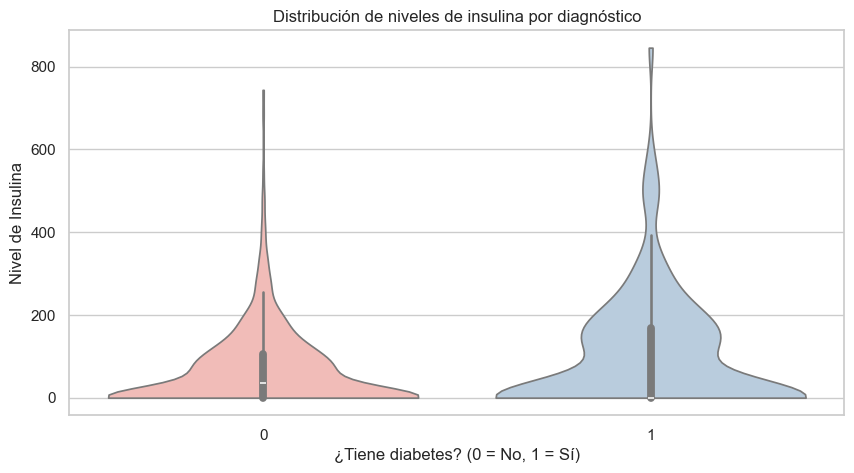

In [44]:
sns.violinplot(x='Outcome', y='Insulin', data=df_combined, hue='Outcome', palette='Pastel1', cut=0, legend=False)
plt.title("Distribución de niveles de insulina por diagnóstico")
plt.xlabel("¿Tiene diabetes? (0 = No, 1 = Sí)")
plt.ylabel("Nivel de Insulina")
plt.show()


### Gráfico de dispersión 3D: Edad vs Glucosa vs BMI

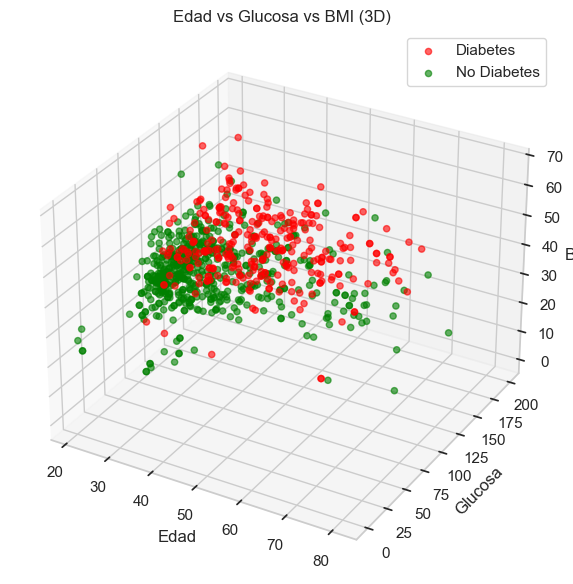

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Separar por outcome
df_pos = df_combined[df_combined['Outcome'] == 1]
df_neg = df_combined[df_combined['Outcome'] == 0]

# Scatter positivo (diabéticos)
ax.scatter(df_pos['Age'], df_pos['Glucose'], df_pos['BMI'],
           c='red', label='Diabetes', alpha=0.6)

# Scatter negativo (no diabéticos)
ax.scatter(df_neg['Age'], df_neg['Glucose'], df_neg['BMI'],
           c='green', label='No Diabetes', alpha=0.6)

ax.set_title("Edad vs Glucosa vs BMI (3D)")
ax.set_xlabel("Edad")
ax.set_ylabel("Glucosa")
ax.set_zlabel("BMI")
ax.legend()
plt.tight_layout()
plt.show()


In [46]:
# Exportar pacientes con niveles altos de glucosa (Nivel de Glucosa mayor a 140)
df_final = df_combined[df_combined['Glucose'] > 140]

df_final.to_csv('../datasets/final_dataset.csv', index=False)

df_final.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1,40-49
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1,30-39
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,50-59
11,10,168.0,74.0,0.0,0.0,38.0,0.537,34,1,30-39
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1,50-59
